In [1]:
from monte_carlo_learning.monte_carlo_tic_tac import MonteCarloAgent

f

In [2]:
import pickle as pkl
import pandas as pd 

In [19]:
from pathlib import Path

In [4]:

top_path =  Path( "./runs/games-5005000_learning_rate-0.001_01-03-2024_04-13-41/")

In [51]:
with open(r"./runs/games-30002400_learning_rate-_01-31-2024_22-05-29/Reducing learning rate large scale test_latest_overall_results_30002400_lr_0.7930292939823262.pkl","rb") as f:
    raw_test_data = pkl.load(f)

In [53]:
with open(r"./runs/games-30002400_learning_rate-_01-31-2024_22-05-29/Reducing learning rate large scale test_Combination_super_carlo_30002400_lr_0.7930292939823262.pkl","rb") as f:
    mc_model = pkl.load(f)

In [54]:
mc_model.q_values

{(0, 0, 0, 0, 0, 0, 0, 0, 0): {0: 0.649277279843112,
  1: 0.5533474713123737,
  2: 0.6362410572523453,
  3: 0.541078953524005,
  4: 0.752073022387354,
  5: 0.5411593921828004,
  6: 0.6417790418854767,
  7: 0.551773613697289,
  8: 0.6417902370582331},
 (1, 0, 0, 0, 0, 0, 0, 0, 0): {0: 0.7272996899161673,
  1: 0.5896989153056487,
  2: 0.7290713780673282,
  3: 0.4241658957497275,
  4: 0.6520416687056608,
  5: 0.5953215305900036,
  6: 0.7014536596033651,
  7: 0.6177492855146904},
 (2, 0, 0, 0, 0, 0, 0, 0, 0): {0: 0.0,
  1: 0.0,
  2: 0.0,
  3: 0.0,
  4: 0.0,
  5: 0.0,
  6: 0.0,
  7: 0.0},
 (0, 1, 0, 0, 0, 0, 0, 0, 0): {0: 0.5281447525872984,
  1: 0.5311129318552426,
  2: 0.6279100011317662,
  3: 0.338555796597451,
  4: 0.572656731200721,
  5: 0.4605513407427868,
  6: 0.6810198300900621,
  7: 0.4738893135142077},
 (1, 1, 0, 0, 0, 0, 0, 0, 0): {0: 0.0,
  1: 0.0,
  2: 0.0,
  3: 0.0,
  4: 0.0,
  5: 0.0,
  6: 0.0},
 (2, 1, 0, 0, 0, 0, 0, 0, 0): {0: 0.26963973848648776,
  1: 0.48894761356061667,


In [55]:
q_val_df = pd.DataFrame(mc_model.q_values.values())


array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>],
       [<Axes: title={'center': '3'}>, <Axes: title={'center': '4'}>,
        <Axes: title={'center': '5'}>],
       [<Axes: title={'center': '6'}>, <Axes: title={'center': '7'}>,
        <Axes: title={'center': '8'}>]], dtype=object)

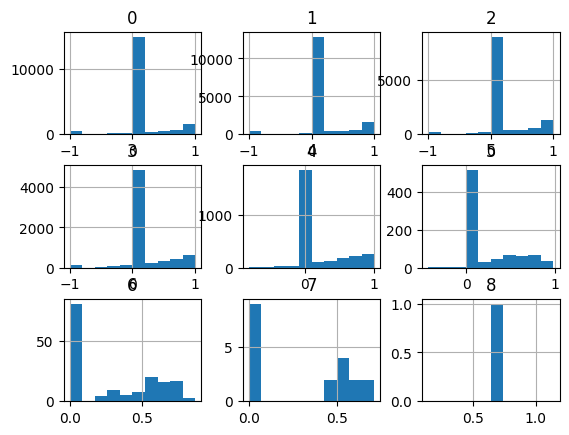

In [56]:
q_val_df.hist()

In [57]:
q_val_df.iloc[:,8].isna().sum()

19682

In [58]:
list_lengths = [len(x) for x in mc_model.q_values.values()]

In [59]:
ll_df = pd.DataFrame(list_lengths,columns=["length"])

In [60]:
ll_df[ll_df["length"]!=9]

,length
1,8
2,8
3,8
4,7
5,7
...,...
19678,0
19679,0
19680,1
19681,0


array([[<Axes: title={'center': 'length'}>]], dtype=object)

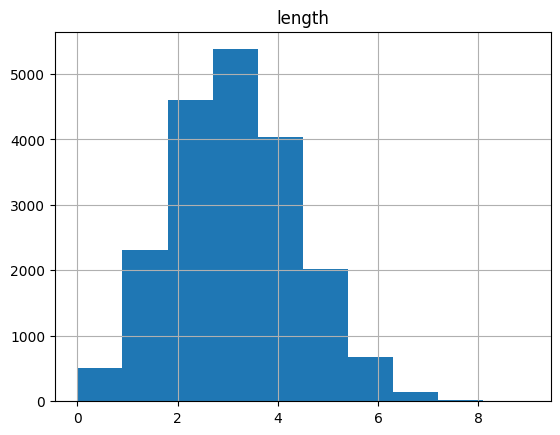

In [61]:
ll_df.hist()

In [62]:
q_val_df[q_val_df.isna().sum(axis=1)==0]

,0,1,2,3,4,5,6,7,8
0,0.649277,0.553347,0.636241,0.541079,0.752073,0.541159,0.641779,0.551774,0.64179


In [63]:
raw_test_data

{100008: (0.95, 4185, 1196),
 200016: (0.9250019998400127, 4450, 1142),
 300024: (0.9125029997600191, 4332, 1139),
 400032: (0.9041703330400234, 4525, 1076),
 500040: (0.8979208330000266, 4400, 1172),
 600048: (0.8929212329680292, 4464, 1169),
 700056: (0.8887548996080313, 4576, 1147),
 800064: (0.8851837567280332, 4508, 1108),
 900072: (0.8820590067080347, 4548, 1164),
 1000080: (0.8792814511347028, 4457, 1179),
 1100088: (0.8767816511187041, 4554, 1192),
 1200096: (0.8745091056496144, 4526, 1155),
 1300104: (0.8724259389696154, 4506, 1160),
 1400112: (0.8705030158803856, 4531, 1183),
 1500120: (0.8687174444403865, 4529, 1227),
 1600128: (0.8670509110963873, 4628, 1160),
 1700136: (0.8654885360863881, 4535, 1131),
 1800144: (0.8640180654887418, 4541, 1157),
 1900152: (0.8626292877020759, 4529, 1136),
 2000160: (0.8613136034831292, 4552, 1164),
 2100168: (0.8600637034751298, 4579, 1161),
 2200176: (0.8588733225151305, 4536, 1141),
 2300184: (0.8577370497805856, 4620, 1148),
 2400192: (

In [69]:
import numpy as np
total_non_0_all_q_values:int =  0
for key, values  in mc_model.q_values.items():
    #print(sum(values.values()))
    #if sum(values.values()) > 0:
    #    total_non_0_all_q_values +=1
    if not np.any(values.values()):
         total_non_0_all_q_values +=1

In [70]:
total_non_0_all_q_values

512

In [66]:
mc_model.q_values

{(0, 0, 0, 0, 0, 0, 0, 0, 0): {0: 0.649277279843112,
  1: 0.5533474713123737,
  2: 0.6362410572523453,
  3: 0.541078953524005,
  4: 0.752073022387354,
  5: 0.5411593921828004,
  6: 0.6417790418854767,
  7: 0.551773613697289,
  8: 0.6417902370582331},
 (1, 0, 0, 0, 0, 0, 0, 0, 0): {0: 0.7272996899161673,
  1: 0.5896989153056487,
  2: 0.7290713780673282,
  3: 0.4241658957497275,
  4: 0.6520416687056608,
  5: 0.5953215305900036,
  6: 0.7014536596033651,
  7: 0.6177492855146904},
 (2, 0, 0, 0, 0, 0, 0, 0, 0): {0: 0.0,
  1: 0.0,
  2: 0.0,
  3: 0.0,
  4: 0.0,
  5: 0.0,
  6: 0.0,
  7: 0.0},
 (0, 1, 0, 0, 0, 0, 0, 0, 0): {0: 0.5281447525872984,
  1: 0.5311129318552426,
  2: 0.6279100011317662,
  3: 0.338555796597451,
  4: 0.572656731200721,
  5: 0.4605513407427868,
  6: 0.6810198300900621,
  7: 0.4738893135142077},
 (1, 1, 0, 0, 0, 0, 0, 0, 0): {0: 0.0,
  1: 0.0,
  2: 0.0,
  3: 0.0,
  4: 0.0,
  5: 0.0,
  6: 0.0},
 (2, 1, 0, 0, 0, 0, 0, 0, 0): {0: 0.26963973848648776,
  1: 0.48894761356061667,
